For your Individual Project, using the same **nyc-violations-data**, conduct an **Exploratory Data Analysis** on the dataset and produce a report in your Jupyter Notebook describing insights gleaned from the dataset. Please note that this EDA report must contain appropriate visualizations, to show trends and insights gleaned.

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
# create a list of columns you want to load into Data Frame
# load CSV file with pandas read_csv function
cols_list = ['Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 'Violation Time', 'Street Name', 'Violation Code']
parking_violations = pd.read_csv('C:\Data Analytics Professional\Week 9/violations.csv', usecols = cols_list)

violations_df = pd.DataFrame(parking_violations)
violations_df

,Plate ID,Registration State,Violation Code,Vehicle Make,Violation Time,Street Name,Vehicle Color
0,KGK6659,NY,36,BMW,0637P,WB ATLANTIC AVE @ SH,GY
1,L5232HY,TN,21,INTER,0853A,Rockaway Beach Blvd,WHITE
2,BPMN76,FL,20,NISSA,0853A,W 113th St,BLACK
3,57387MJ,NY,38,NaN,0444P,W 33rd St,WH
4,M81KFJ,NJ,36,TOYOT,0723A,WB FOSTER AVE @ E 18,NaN
...,...,...,...,...,...,...,...
49995,JPN4910,NY,5,FORD,0342P,EB E 125TH ST @ 2ND,RD
49996,174ZYG,CT,31,TOYOT,0828A,W 13th St,BLACK
49997,HES6895,NY,46,CADIL,0933P,E 182nd St,RD
49998,63035MN,NY,40,ISUZU,1215P,W Kingsbridge Rd,WH


# 1. Registration States with the Highest Number of Offenders

In [3]:
# remove missing values and count the number of offenders in each Registration State
registration_state_list = list(violations_df['Registration State'].dropna(axis = 'index', how = 'all'))
registration_state_count = Counter(registration_state_list)

# to return a list of tuples and not dictionaries of Registration States and their value_counts(the number of offenders from each state)
# use the most_common() method and include all the states
registration_state_count = registration_state_count.most_common(len(registration_state_count))

In [4]:
total_tickets = []
for i in registration_state_count:
    total_tickets.append(i[1])

mean = sum(total_tickets)/len(total_tickets)

registration_state = [] # list of the Registration States
total_offenders = []
values_below_mean = [] # list of total number of offenders in each state where
# the totals are below the average of the total of all offenders across all the Registration States 

for value in registration_state_count:
    if value[1] > mean:
        registration_state.append(value[0])
        total_offenders.append(value[1])
    else:
        values_below_mean.append(value[1])
registration_state.append('Others')
total_offenders.append(sum(values_below_mean))

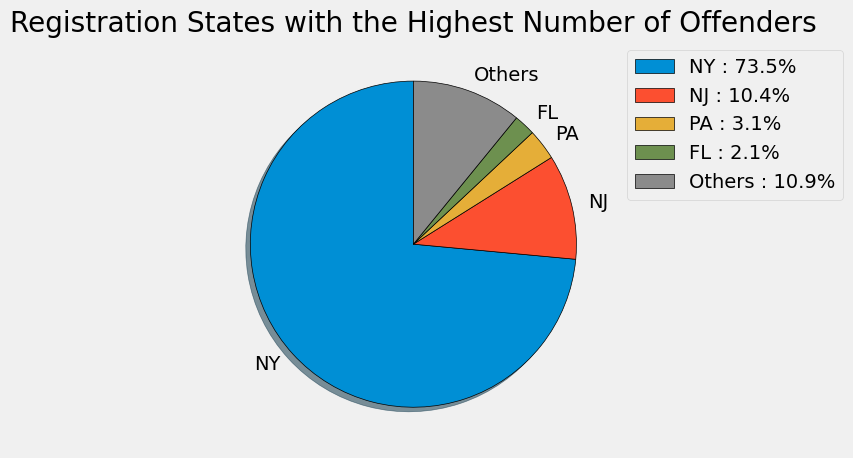

In [5]:
plt.style.use('fivethirtyeight')

slices = total_offenders
slice_labels = registration_state
size_pct = [((i/sum(total_offenders))*100) for i in total_offenders] # list of the percentage sizes of each slice

legend_labels = [f'{l} : {s:0.1f}%' for l, s in zip(slice_labels, size_pct)]
plt.pie(slices, labels = slice_labels, shadow = True, startangle = 90, wedgeprops = {'edgecolor' : 'black'})

plt.title('Registration States with the Highest Number of Offenders')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=legend_labels)
plt.tight_layout()
plt.show()

# 2. Top 20 most common Vehicle Makes among the offenders

In [6]:
vehicle_make_list = list(violations_df['Vehicle Make'].dropna(axis = 'index', how = 'all'))

vehicle_make_count = Counter(vehicle_make_list)
vehicle_make_count = vehicle_make_count.most_common(20)

vehicle_make = [] # list of the 20 most popular vehicle makes among the Offenders
total_vehicles = [] # list of the total number of offenders who have vehicles of each make

for make in vehicle_make_count:
    vehicle_make.append(make[0])
    total_vehicles.append(make[1])

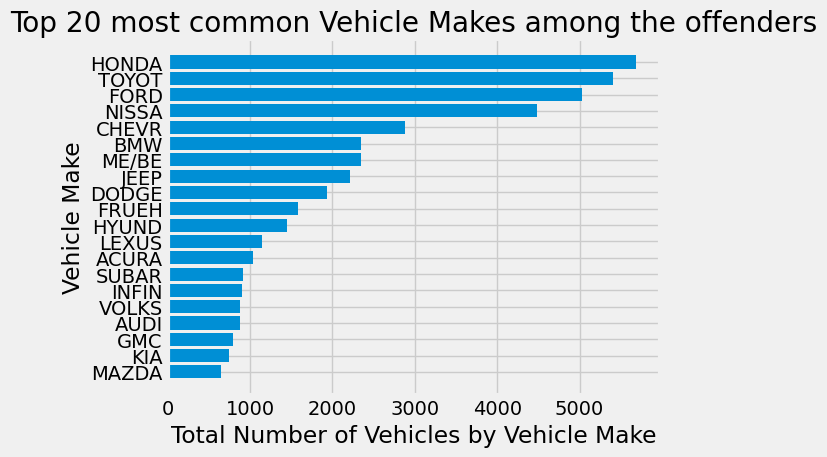

In [7]:
plt.style.use('fivethirtyeight')

vehicle_make.reverse() # list with x values
total_vehicles.reverse() # list with y values

plt.barh(vehicle_make, total_vehicles)

plt.title('Top 20 most common Vehicle Makes among the offenders')
plt.xlabel('Total Number of Vehicles by Vehicle Make')
plt.ylabel('Vehicle Make')

plt.tight_layout()

plt.show()

# 3. The 20 least common Vehicle Makes among the offenders

In [8]:
least_common_vehicle_make_count = Counter(vehicle_make_list)
least_common_vehicle_make_count = dict(sorted(least_common_vehicle_make_count.items(), key=lambda item: item[1]))


least_common_vehicle_make = (list(least_common_vehicle_make_count.keys()))[:20]
total_least_common_vehicles = list(least_common_vehicle_make_count.values())[:20]

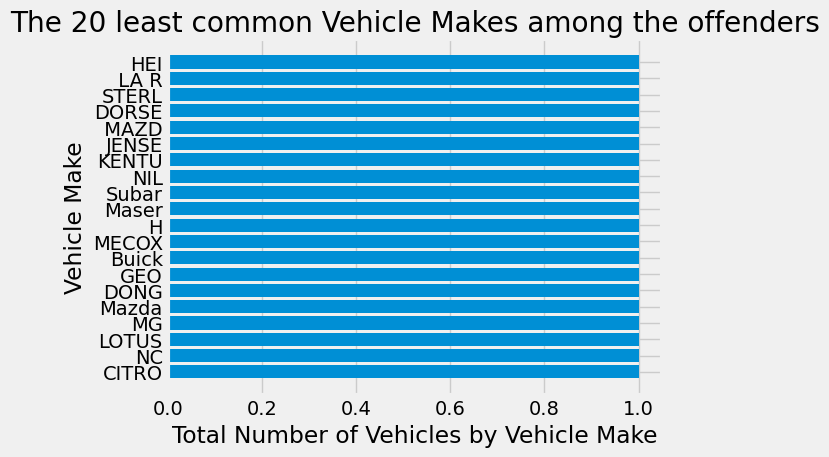

In [9]:
plt.style.use('fivethirtyeight')

least_common_vehicle_make # list of x values
total_least_common_vehicles # list of y values

plt.barh(least_common_vehicle_make, total_least_common_vehicles)

plt.title('The 20 least common Vehicle Makes among the offenders')
plt.xlabel('Total Number of Vehicles by Vehicle Make')
plt.ylabel('Vehicle Make')

plt.tight_layout()

plt.show()

# 4. The Street Names with the Highest Number of recorded Parking Violations

In [10]:
street_name_list = list(violations_df['Street Name'].dropna(axis = 'index', how = 'all'))

street_name_count = Counter(street_name_list)
street_name_count = street_name_count.most_common(20)
street_name_count

street_name = []
total_violations = []

for make in street_name_count:
    street_name.append(make[0])
    total_violations.append(make[1])

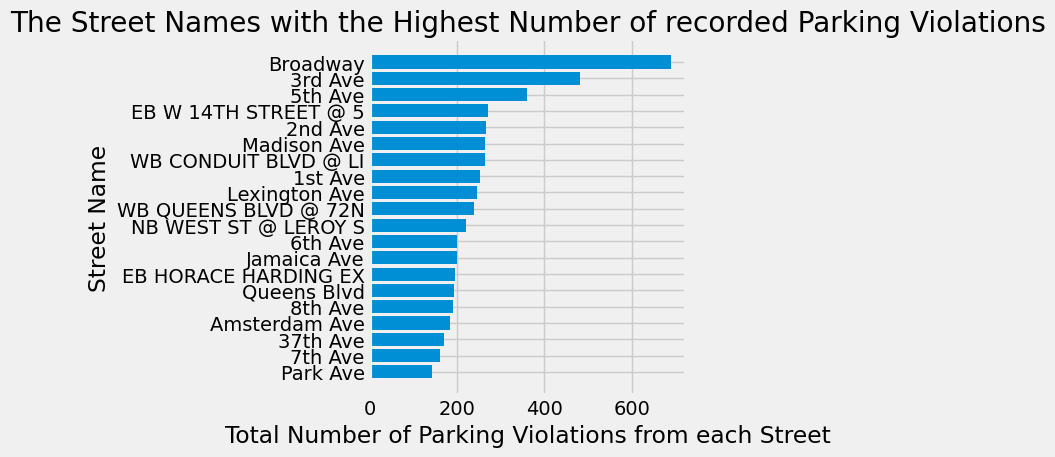

In [11]:
plt.style.use('fivethirtyeight')

street_name.reverse() # list of x values
total_violations.reverse() # list of y values

plt.barh(street_name, total_violations)

plt.title('The Street Names with the Highest Number of recorded Parking Violations')
plt.xlabel('Total Number of Parking Violations from each Street')
plt.ylabel('Street Name')

plt.tight_layout()

plt.show()

# 5. Distribution of Violation Codes of Offenders in New York City

In [12]:
violation_code_list = list(violations_df['Violation Code'].dropna(axis = 'index', how = 'all'))

violation_code_count = Counter(violation_code_list)

violation_code = list(violation_code_count.keys())
total_of_each_code_broken = list(violation_code_count.values())

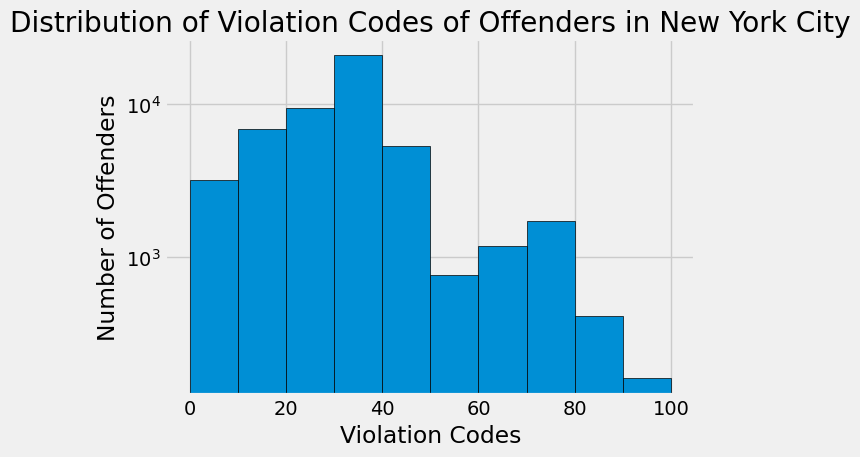

In [13]:
plt.style.use('fivethirtyeight')

start = round(violations_df['Violation Code'].min(), -1)
stop = round(violations_df['Violation Code'].max(), -1)
step = 10

v_code = violations_df['Violation Code']
bns = list(np.arange(start, stop + step, step))

plt.hist(v_code, bins = bns, edgecolor = 'black', log = True)

plt.title('Distribution of Violation Codes of Offenders in New York City')
plt.xlabel('Violation Codes')
plt.ylabel('Number of Offenders')

plt.tight_layout()

plt.show()

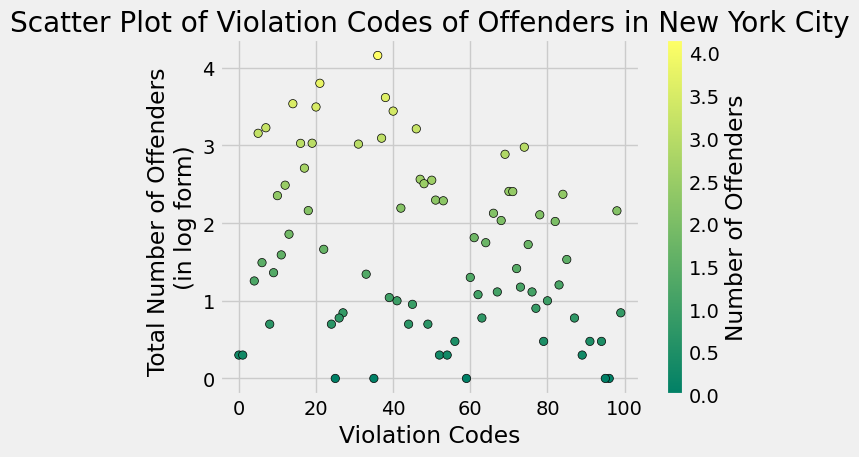

In [14]:
plt.style.use('fivethirtyeight')

violation_code # list of x values
total_offenders = np.log10(total_of_each_code_broken) # list of y values in log form

plt.scatter(violation_code, total_offenders, c = total_offenders, cmap = 'summer', edgecolor = 'black')

plt.title('Scatter Plot of Violation Codes of Offenders in New York City')
plt.xlabel('Violation Codes')
plt.ylabel('Total Number of Offenders \n(in log form)')

cbar = plt.colorbar()
cbar.set_label('Number of Offenders')

plt.tight_layout()

plt.show()

### **CMAP OPTIONS**
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

# 6. Top 5 Most Popular Colors of Vehicles among the Offenders

In [15]:
vehicle_color_list = list(violations_df['Vehicle Color'].dropna(axis = 'index', how = 'all'))
vehicle_color_count = Counter(vehicle_color_list)
vehicle_color_count = dict(sorted(vehicle_color_count.items(), key=lambda item: item[1], reverse = True))

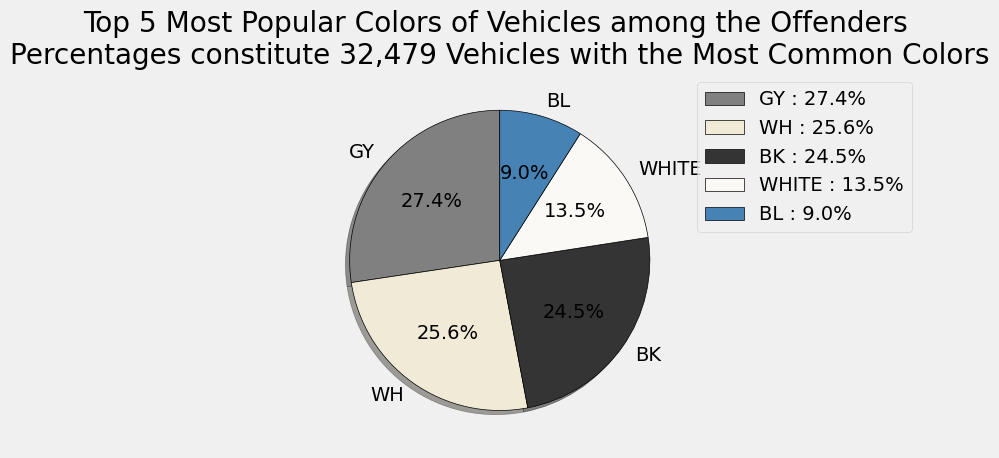

In [16]:
plt.style.use('fivethirtyeight')

vehicle_color = (list(vehicle_color_count.keys()))[:5]
total_offenders = (list(vehicle_color_count.values()))[:5]

slices = total_offenders
slice_labels = vehicle_color
size_pct = [((i/sum(total_offenders))*100) for i in total_offenders] # list of the percentage sizes of each slice
color_list = ['#808080', '#F0EAD6', '#343434', '#FAF9F6', '#4682B4']

legend_labels = [f'{l} : {s:0.1f}%' for l, s in zip(slice_labels, size_pct)]
plt.pie(slices, labels = slice_labels, colors = color_list, shadow = True, autopct = '%1.1f%%', startangle = 90, wedgeprops = {'edgecolor' : 'black'})

plt.title(f'Top 5 Most Popular Colors of Vehicles among the Offenders \nPercentages constitute {sum(total_offenders):,} Vehicles with the Most Common Colors')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=legend_labels)
plt.tight_layout()
plt.show()

# 7. Times with the Highest Number of Parking Violations Recorded

In [17]:
time_dict = {}
violation_time_series = violations_df['Violation Time'].dropna(axis = 'index', how = 'all')

for str_time in violation_time_series:
    split_time, split_unit = 2, 4
    hr = str_time[:split_time]
    mnt = str_time[split_time:][:split_time]
    unit = str_time[split_unit:] + 'M'
    time_final = hr + ':' + mnt + ' ' + unit

    time_dict[str_time] = time_final

violation_time_series.replace(time_dict, inplace = True)

In [18]:
violation_time_list = list(violation_time_series)
violation_time_count = Counter(violation_time_list)
violation_time_count = dict(sorted(violation_time_count.items(), key=lambda item: item[1], reverse = True))

violation_time = (list(violation_time_count.keys()))[:11]
total_tickets = (list(violation_time_count.values()))[:11]

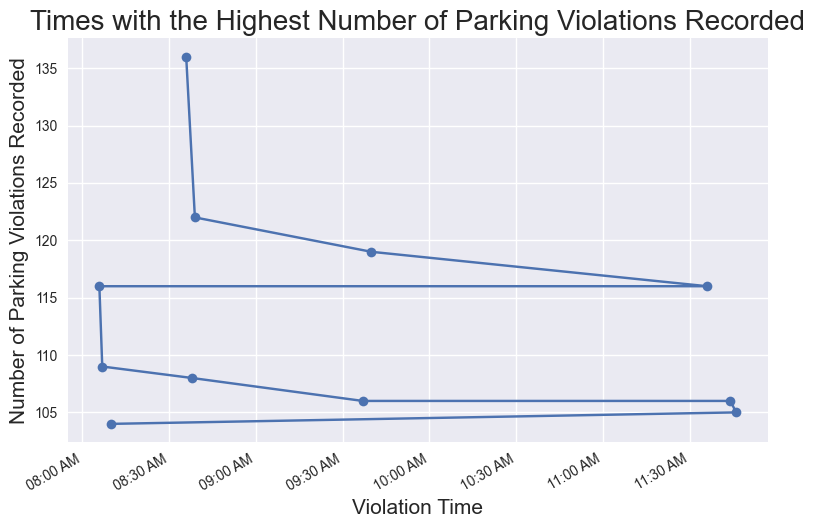

In [19]:
plt.style.use('seaborn-v0_8')

datetime_list = []

for time_string in violation_time:
    datetime_list.append(datetime.strptime(time_string, '%H:%M %p'))

x_values = datetime_list
y_values = total_tickets

plt.plot_date(x_values, y_values, linestyle = 'solid')

plt.gcf().autofmt_xdate()

time_format = mpl_dates.DateFormatter('%I:%M %p')

plt.gca().xaxis.set_major_formatter(time_format)

plt.title('Times with the Highest Number of Parking Violations Recorded', fontsize = 20)
plt.xlabel('Violation Time', fontsize = 15)
plt.ylabel('Number of Parking Violations Recorded', fontsize = 15)

plt.tight_layout()

plt.show()